PART A: BASIC EDA

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [107]:
# 1. Load datasets
df = pd.read_csv(r"/content/Mall_Customers(customer_segmentation).csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
df1 = pd.read_csv(r"/content/Online Retail(customer_segmentation).csv")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [109]:
# 2. Show the dataset shape (rows, columns) and column names with dtypes.
print("Dataset shape:", df.shape)

df.info()

Dataset shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [110]:
print("Dataset shape:", df1.shape)

df1.info()

Dataset shape: (49445, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49445 non-null  object 
 1   StockCode    49445 non-null  object 
 2   Description  49303 non-null  object 
 3   Quantity     49445 non-null  int64  
 4   InvoiceDate  49445 non-null  object 
 5   UnitPrice    49444 non-null  float64
 6   CustomerID   31563 non-null  float64
 7   Country      49444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [111]:
# 3.Count unique values per column and list the top 10 most frequent values in a categorical field.
print(df.nunique())
frequent_genders = df['Genre'].value_counts().head(10)

print(frequent_genders)



CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64
Genre
Female    112
Male       88
Name: count, dtype: int64


In [112]:
print(df1.nunique())

print(df1['Description'].value_counts().head(10))

InvoiceNo      2313
StockCode      2876
Description    2814
Quantity        214
InvoiceDate    2041
UnitPrice       314
CustomerID     1027
Country          24
dtype: int64
Description
WHITE HANGING HEART T-LIGHT HOLDER    283
REGENCY CAKESTAND 3 TIER              225
HAND WARMER BABUSHKA DESIGN           187
PAPER CHAIN KIT 50'S CHRISTMAS        180
SCOTTIE DOG HOT WATER BOTTLE          174
HEART OF WICKER SMALL                 172
CHOCOLATE HOT WATER BOTTLE            167
JAM MAKING SET PRINTED                160
JUMBO BAG RED RETROSPOT               148
SMALL POPCORN HOLDER                  145
Name: count, dtype: int64


In [113]:
# 4. Find missing values per column and report counts.
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [114]:
# 4. Find missing values per column and report counts.
print("\nMissing values per column:")
print(df1.isnull().sum())



Missing values per column:
InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     17882
Country            1
dtype: int64


In [115]:
# 5. Show summary statistics for numeric columns.
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [116]:
# 5. Show summary statistics for numeric columns.
print("\nSummary statistics for numeric columns:")
print(df1.describe())


Summary statistics for numeric columns:
           Quantity    UnitPrice    CustomerID
count  49445.000000  49444.00000  31563.000000
mean       8.315239      6.45837  15423.016823
std       55.832343    167.43771   1753.298111
min    -9360.000000      0.00000  12347.000000
25%        1.000000      1.25000  14051.000000
50%        2.000000      2.51000  15464.000000
75%        8.000000      4.25000  17041.000000
max     2880.000000  16888.02000  18283.000000


In [117]:
# 6. Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.

bins = [0, 18, 30, 50, 65, 100]
labels = ['<18 (Teen)', '18-29 (Young Adult)', '30-49 (Adult)', '50-64 (Senior)', '65+ (Elderly)']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# count
age_group_counts = df['Age_Group'].value_counts()


print(age_group_counts)

Age_Group
30-49 (Adult)          100
18-29 (Young Adult)     55
50-64 (Senior)          31
65+ (Elderly)           14
<18 (Teen)               0
Name: count, dtype: int64


In [118]:
# 7.Detect and count any unrealistic values (e.g., negative or zero values).
unrealistic_age = df[df['Age'] <= 0].shape[0]
unrealistic_income = df[df['Annual Income (k$)'] <= 0].shape[0]
unrealistic_spending = df[df['Spending Score (1-100)'] <= 0].shape[0]

print(f"Age <= 0: {unrealistic_age}")
print(f"Annual Income <= 0: {unrealistic_income}")
print(f"Spending Score <= 0: {unrealistic_spending}")


Age <= 0: 0
Annual Income <= 0: 0
Spending Score <= 0: 0


In [119]:
unrealistic_quantity = df1[df1['Quantity'] <= 0].shape[0]
unrealistic_unitprice = df1[df1['UnitPrice'] <= 0].shape[0]

print("Number of unrealistic values:")
print(f"Quantity <= 0: {unrealistic_quantity}")
print(f"UnitPrice <= 0: {unrealistic_unitprice}")



Number of unrealistic values:
Quantity <= 0: 992
UnitPrice <= 0: 297


In [120]:
# 8. Find how many unique customers exist and which group/category is most common.

unique_customers = df['CustomerID'].nunique()
print(unique_customers)
most_common_gender = df['Genre'].mode()
print(f"Most common gender: {most_common_gender}")

200
Most common gender: 0    Female
Name: Genre, dtype: object


Part B — Data cleaning & filtering

In [121]:
# 9. Remove rows with missing values in a key column and explain the pros/cons.

initial_rows = df1.shape[0]
df1_cleaned = df1.dropna(subset=['CustomerID'])

rows_removed = initial_rows - df1_cleaned.shape[0]


print(f"The new DataFrame has {df1_cleaned.shape[0]} rows.")

The new DataFrame has 31563 rows.


In [122]:
initial_rows = df1_cleaned.shape[0]
df_no_duplicates = df1_cleaned.drop_duplicates()
duplicates_dropped = initial_rows - df_no_duplicates.shape[0]

print(f"Dropped {duplicates_dropped} duplicate rows.")

Dropped 522 duplicate rows.


In [123]:
# 11. Filter out records where Age < 18.
df_filtered_age = df[df['Age'] >= 18].copy()
records_filtered_out = initial_rows - df_filtered_age.shape[0]

print(f"Filtered out {records_filtered_out} records where Age < 18.")

Filtered out 31363 records where Age < 18.


In [124]:
# 12. Create a new categorical column from numeric data using conditional statements.

df_filtered_age['Spending_Category'] = np.where(
    df_filtered_age['Spending Score (1-100)'] > 50,
    'High Spender',
    'Low Spender'
)

print(df_filtered_age['Spending_Category'].value_counts())
df_filtered_age.head()

Spending_Category
Low Spender     103
High Spender     97
Name: count, dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Spending_Category
0,1,Male,19,15,39,18-29 (Young Adult),Low Spender
1,2,Male,21,15,81,18-29 (Young Adult),High Spender
2,3,Female,20,16,6,18-29 (Young Adult),Low Spender
3,4,Female,23,16,77,18-29 (Young Adult),High Spender
4,5,Female,31,17,40,30-49 (Adult),Low Spender


In [125]:
# 13. Replace missing values in a numeric column with the mean.

mean_income = df_filtered_age['Annual Income (k$)'].mean()
df_filled_income = df_filtered_age.copy()
df_filled_income['Annual Income (k$)'].fillna(mean_income, inplace=True)

print("Missing values in 'Annual Income (k$)' replaced with the mean.")

Missing values in 'Annual Income (k$)' replaced with the mean.


/tmp/ipython-input-898759567.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_income['Annual Income (k$)'].fillna(mean_income, inplace=True)


In [126]:
# 14. Bucket customers into categories based on quantiles (e.g., spending level).

df_filled_income['Spending_Level'] = pd.qcut(
    df_filled_income['Spending Score (1-100)'],
    q=4,
    labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)']
)
df_filled_income.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Spending_Category,Spending_Level
0,1,Male,19,15,39,18-29 (Young Adult),Low Spender,Q2
1,2,Male,21,15,81,18-29 (Young Adult),High Spender,Q4 (High)
2,3,Female,20,16,6,18-29 (Young Adult),Low Spender,Q1 (Low)
3,4,Female,23,16,77,18-29 (Young Adult),High Spender,Q4 (High)
4,5,Female,31,17,40,30-49 (Adult),Low Spender,Q2
5,6,Female,22,17,76,18-29 (Young Adult),High Spender,Q4 (High)
6,7,Female,35,18,6,30-49 (Adult),Low Spender,Q1 (Low)
7,8,Female,23,18,94,18-29 (Young Adult),High Spender,Q4 (High)
8,9,Male,64,19,3,50-64 (Senior),Low Spender,Q1 (Low)
9,10,Female,30,19,72,30-49 (Adult),High Spender,Q3


In [127]:
# 15. Explain and apply feature scaling to numeric features.

from sklearn.preprocessing import StandardScaler
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_to_scale = df_filled_income[features_to_scale]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

# EXPLANATION: scaling reduces the magnitude of certain features so that all features contribute equally when appliying models

Part C — Aggregation & feature engineering

In [128]:
# 16. Compute average income by gender using groupby.

average_income_by_gender = df.groupby('Genre')['Annual Income (k$)'].mean()
print(average_income_by_gender)


Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


In [129]:
# 17. Calculate max, min, and mean for numeric columns per group.

group_stats = df.groupby('Genre').agg({
    'Age': ['min', 'max', 'mean'],
    'Annual Income (k$)': ['min', 'max', 'mean']
})
print(group_stats)

       Age                Annual Income (k$)                
       min max       mean                min  max       mean
Genre                                                       
Female  18  68  38.098214                 16  126  59.250000
Male    18  70  39.806818                 15  137  62.227273


In [130]:
# 18. Create a new ratio feature (e.g., income-to-age).

df['Income_to_Age_Ratio'] = df['Annual Income (k$)'] / df['Age']
print(df[['Income_to_Age_Ratio']].head())
df.head()

   Income_to_Age_Ratio
0             0.789474
1             0.714286
2             0.800000
3             0.695652
4             0.548387


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_to_Age_Ratio
0,1,Male,19,15,39,18-29 (Young Adult),0.789474
1,2,Male,21,15,81,18-29 (Young Adult),0.714286
2,3,Female,20,16,6,18-29 (Young Adult),0.800000
3,4,Female,23,16,77,18-29 (Young Adult),0.695652
4,5,Female,31,17,40,30-49 (Adult),0.548387


In [131]:
# 19. Flag “High value” customers based on income and spending greater than average.

avg_income = df['Annual Income (k$)'].mean()
avg_spending = df['Spending Score (1-100)'].mean()


df['High_Value_Customer'] = np.where(
    (df['Annual Income (k$)'] > avg_income) & (df['Spending Score (1-100)'] > avg_spending),
    'Yes',
    'No'
)
df.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_to_Age_Ratio,High_Value_Customer
0,1,Male,19,15,39,18-29 (Young Adult),0.789474,No
1,2,Male,21,15,81,18-29 (Young Adult),0.714286,No
2,3,Female,20,16,6,18-29 (Young Adult),0.800000,No
3,4,Female,23,16,77,18-29 (Young Adult),0.695652,No
4,5,Female,31,17,40,30-49 (Adult),0.548387,No
5,6,Female,22,17,76,18-29 (Young Adult),0.772727,No
6,7,Female,35,18,6,30-49 (Adult),0.514286,No
7,8,Female,23,18,94,18-29 (Young Adult),0.782609,No
8,9,Male,64,19,3,50-64 (Senior),0.296875,No
9,10,Female,30,19,72,30-49 (Adult),0.633333,No


In [132]:
# 20. Compute correlation between numeric features.

numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numeric_features].corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [133]:
# 21. Determine which gender has a higher average spending score.

average_spending_by_gender = df.groupby('Genre')['Spending Score (1-100)'].mean()
print(average_spending_by_gender)

Genre
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [134]:
# 22. Create a pivot table by age group and gender for average spending.

pivot_table_spending = pd.pivot_table(
    df,
    values='Spending Score (1-100)',
    index='Age_Group',
    columns='Genre',
    aggfunc='mean'
)
print(pivot_table_spending)

/tmp/ipython-input-2136794626.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_spending = pd.pivot_table(


Genre                   Female       Male
Age_Group                                
18-29 (Young Adult)  60.379310  56.576923
30-49 (Adult)        51.032787  50.692308
50-64 (Senior)       39.235294  29.071429
65+ (Elderly)        48.000000  46.000000


Part D — Visualizations & group exploration

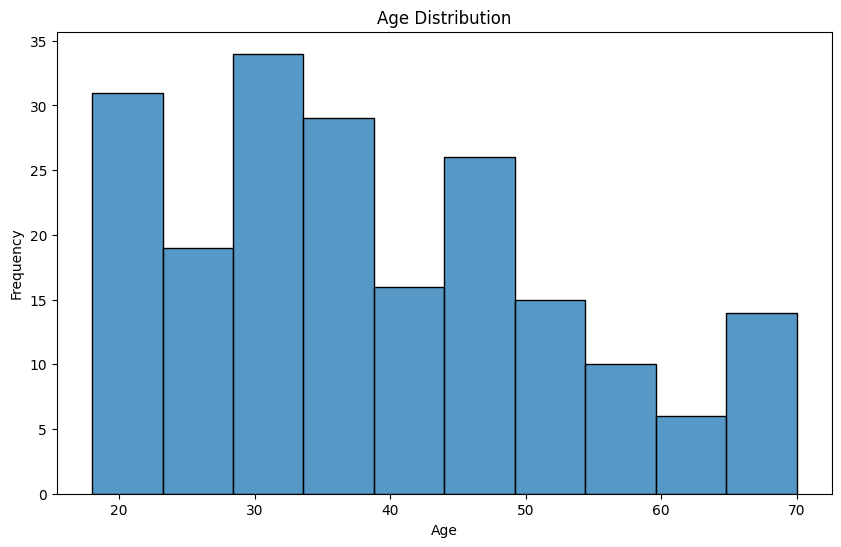

In [135]:
# 23. Plot a histogram of the Age distribution.

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

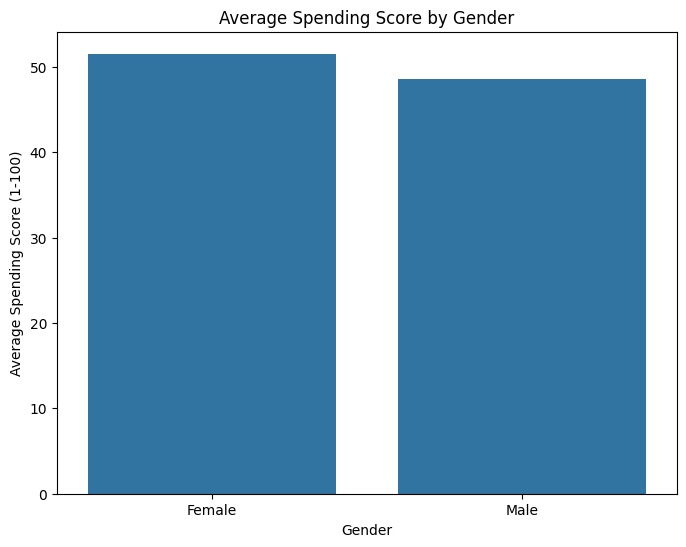

In [136]:
#24. Create a bar chart of average spending score by gender.

avg_spending_by_gender = df.groupby('Genre')['Spending Score (1-100)'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Genre', y='Spending Score (1-100)', data=avg_spending_by_gender)
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score (1-100)')
plt.show()



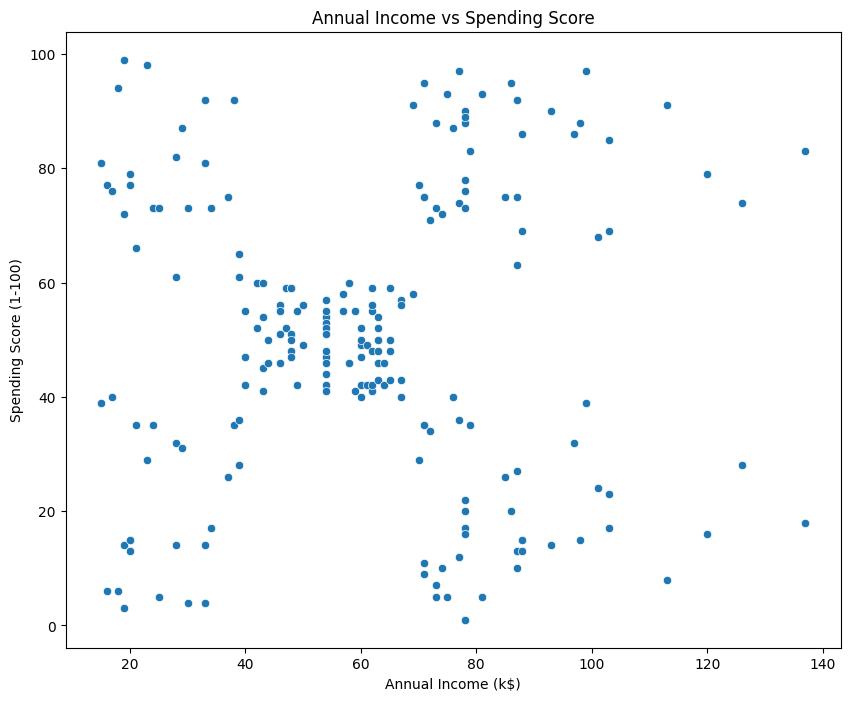

In [137]:
# 25. Create a scatter plot of Annual Income vs Spending Score.

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

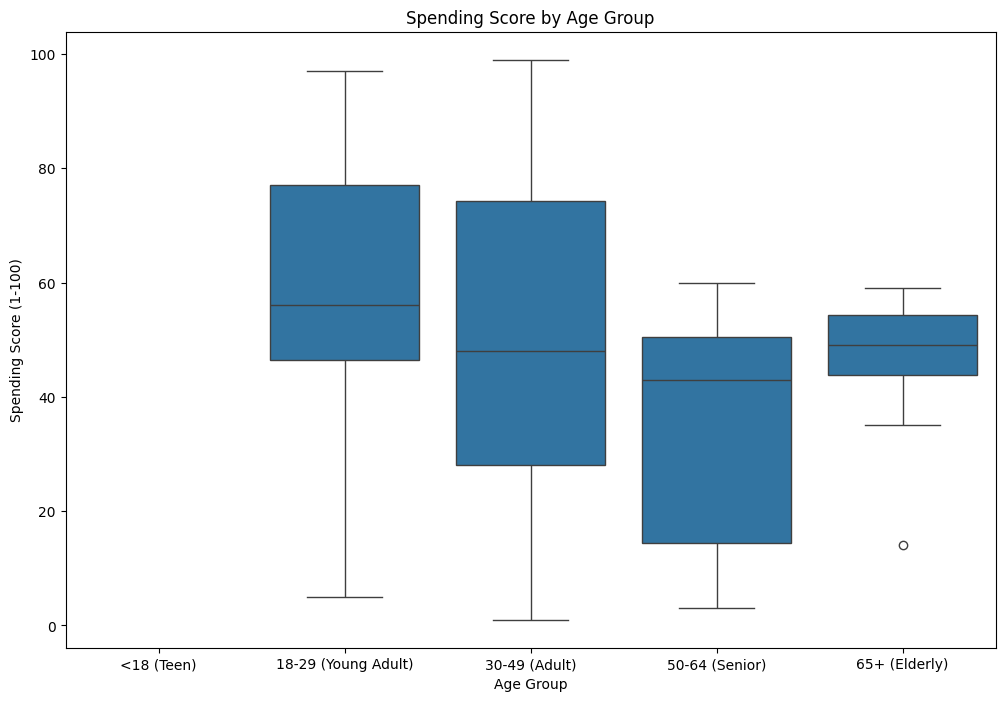

In [138]:
# 26. Create a boxplot of spending score grouped by age bins.

plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='Spending Score (1-100)', data=df, order=labels)
plt.title('Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.show()

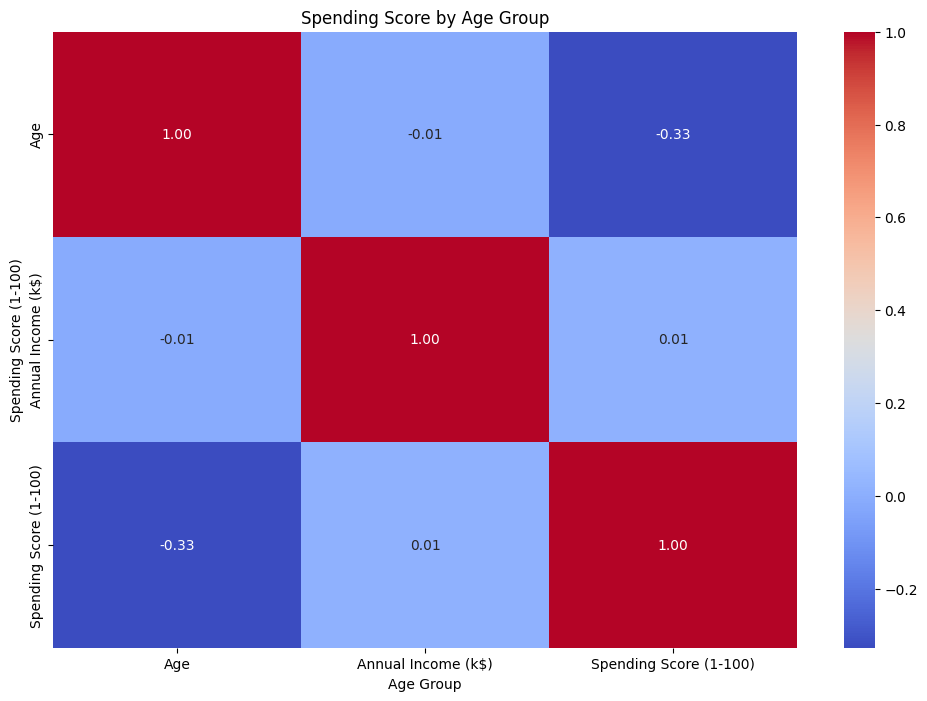

In [139]:
#27. Create a heatmap of correlations between numeric features.

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.show()


PART E

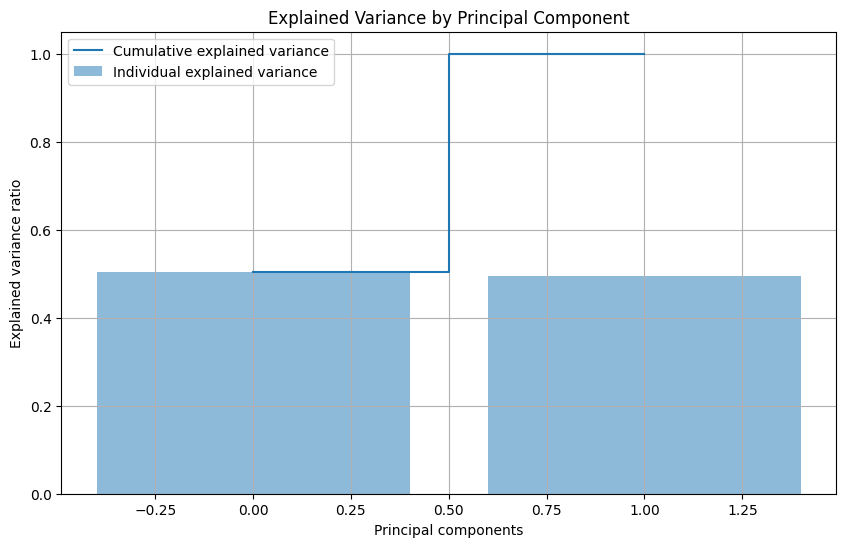

In [140]:
# 28. Run PCA on standardized income and spending features and plot explained variance.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Annual Income (k$)', 'Spending Score (1-100)']
X =df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca =PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(explained_variance)), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Component')
plt.legend(loc='best')
plt.grid(True)
plt.show()




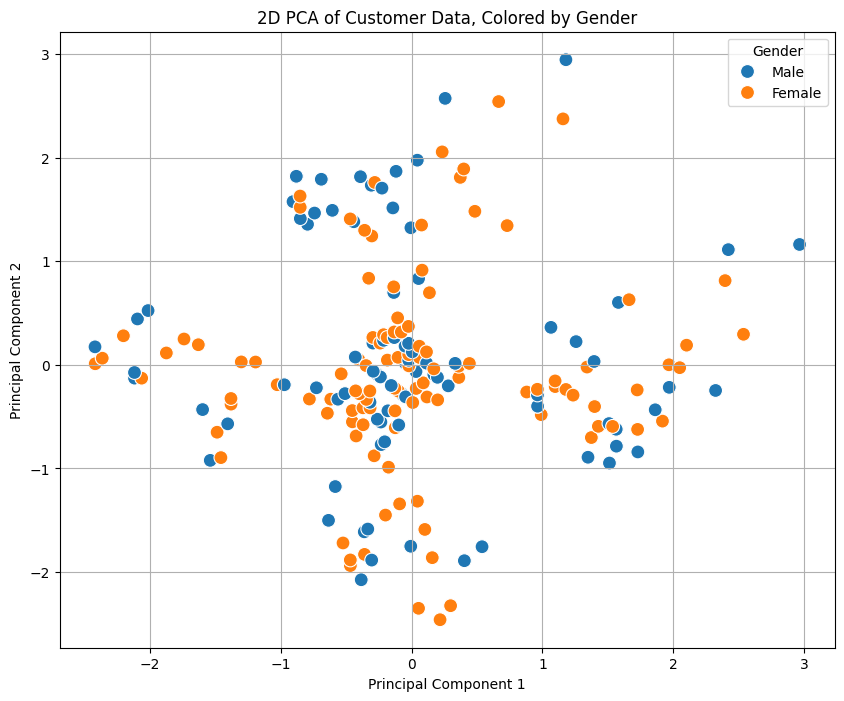

In [141]:
# 29. Plot 2D PCA components scatter colored by a category (e.g., Gender).

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Gender'] = df['Genre']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=pca_df, s=100)
plt.title('2D PCA of Customer Data, Colored by Gender')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

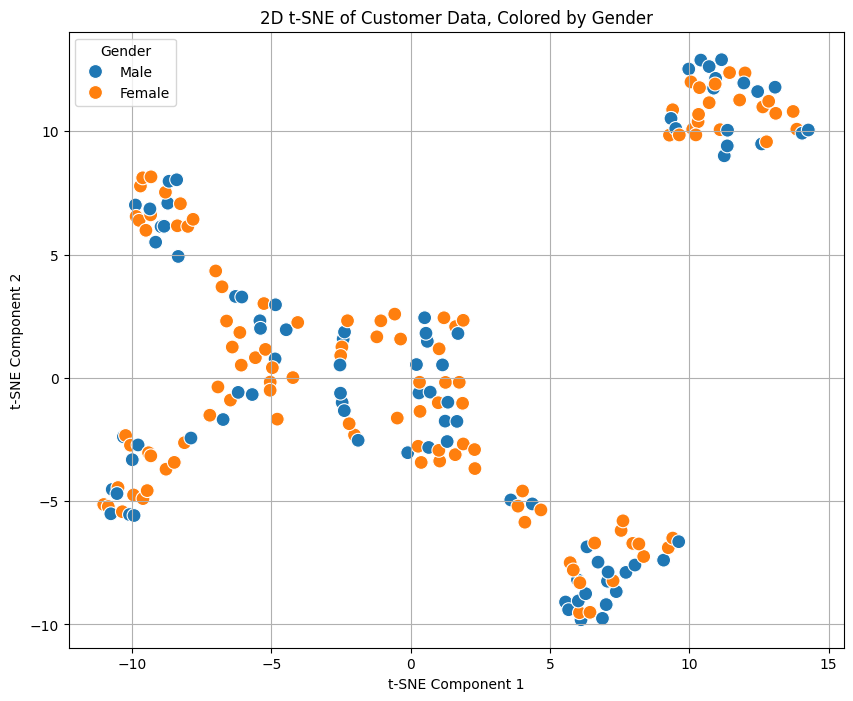

In [142]:
# 30. Run t-SNE and plot the 2D embedding.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['Gender'] = df['Genre']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Gender', data=tsne_df, s=100)
plt.title('2D t-SNE of Customer Data, Colored by Gender')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


 31. Compare PCA and t-SNE plots — which shows clearer clusters?
 The t-SNE plots were more distinct.

Part F — Clustering & evaluation


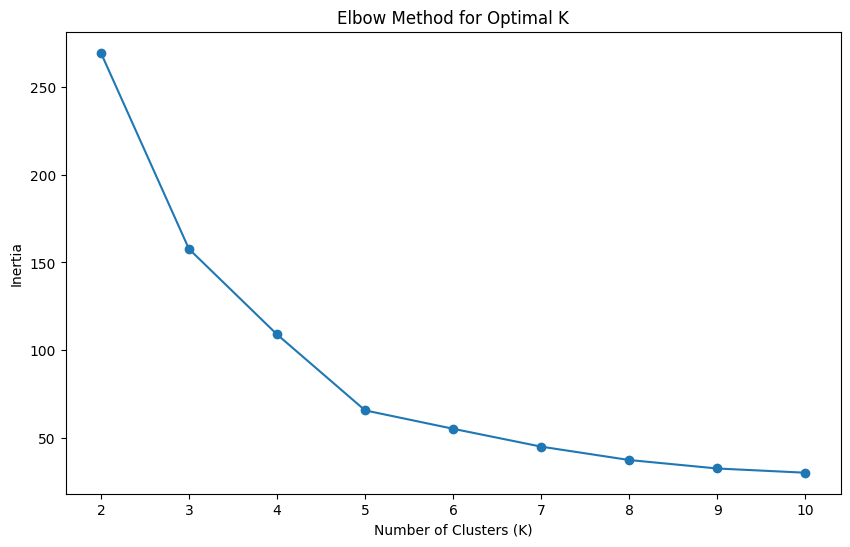

In [143]:
# 32. Run k-means for k=2...10 on standardized features and plot the elbow curve.

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

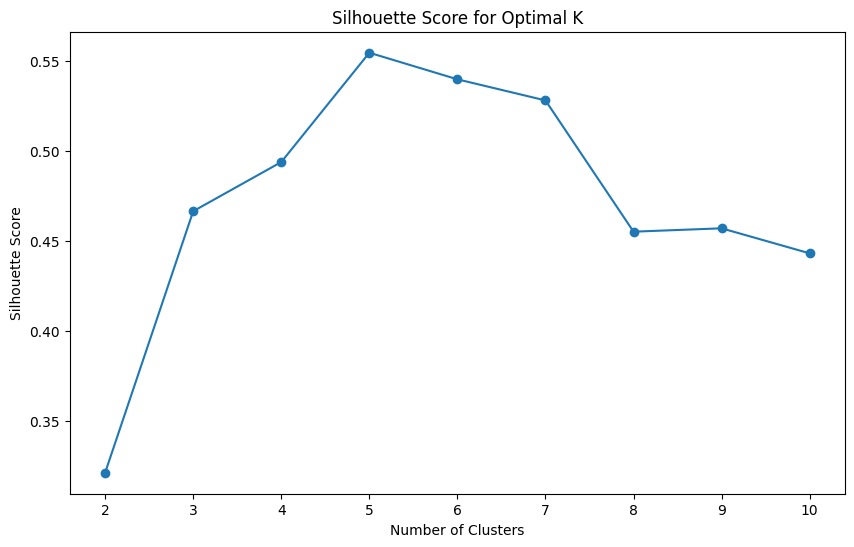

The best k is 5


In [144]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

print(f"The best k is {optimal_k}")

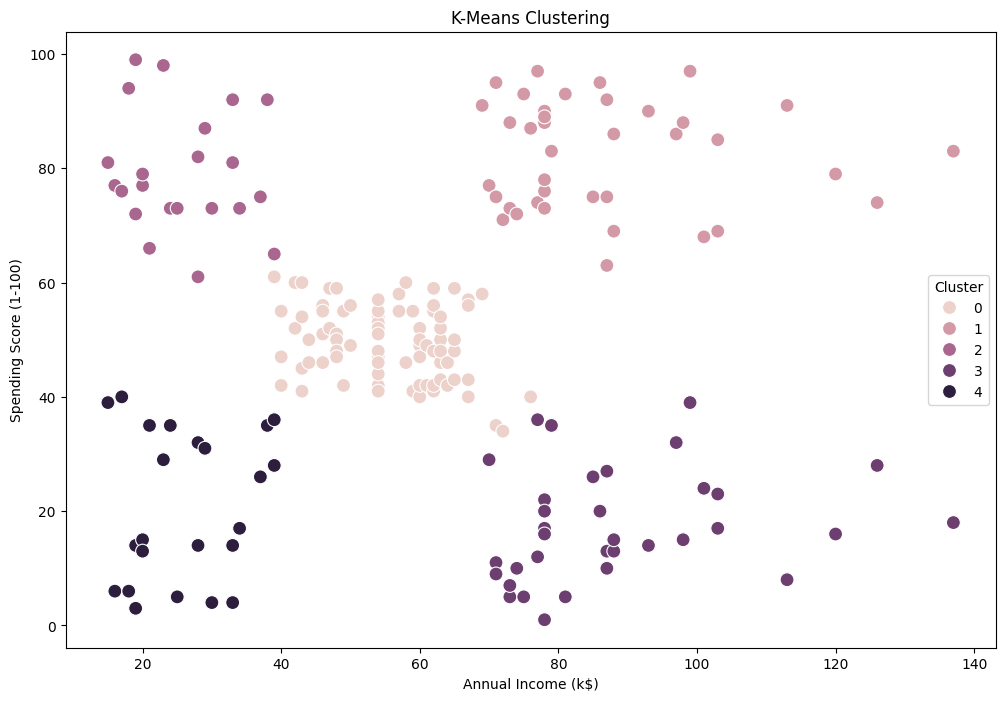

In [145]:
# 34. Plot clusters for the chosen k using a scatter plot.

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, s=100)
plt.title(f'K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

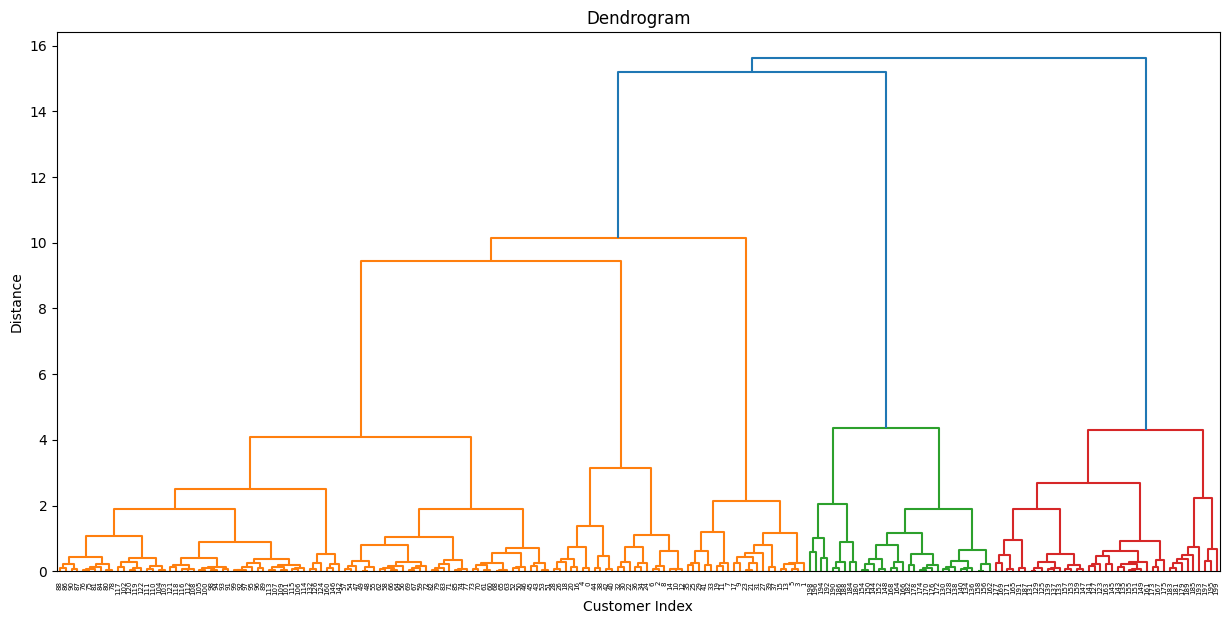

In [146]:
# 35. Run hierarchical clustering and visualize a dendrogram.

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

K-Means Cluster Counts: Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
Hierarchical Cluster Counts:Hierarchical_Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64


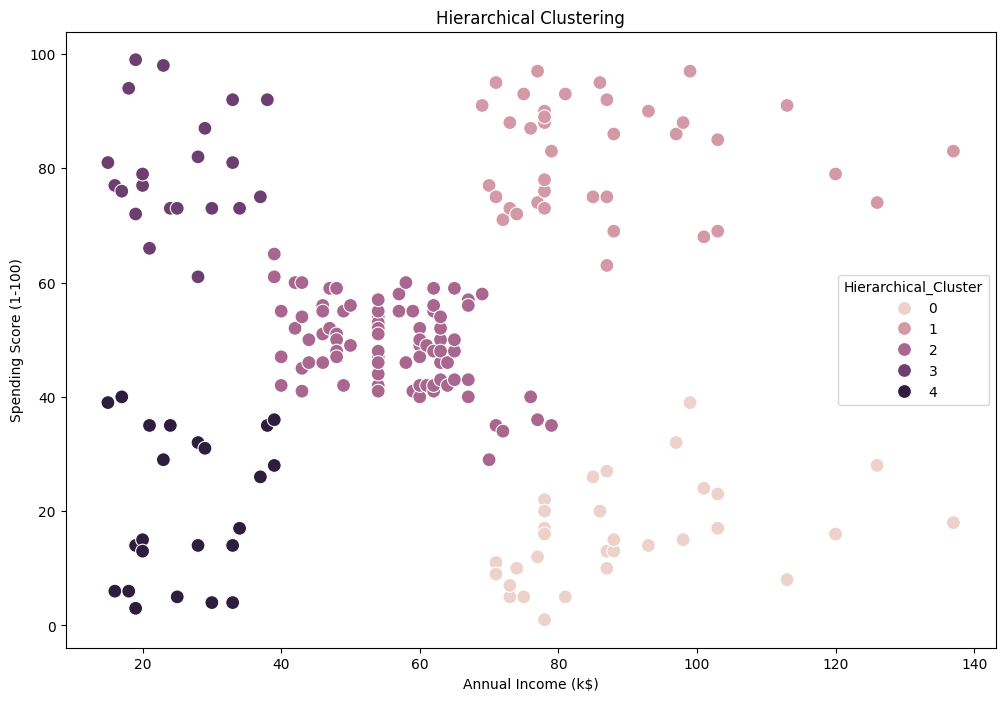

In [147]:
# 36. Cut the dendrogram at k clusters and compare with k-means.

from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['Hierarchical_Cluster'] = hac.fit_predict(X_scaled)

x = df['Cluster'].value_counts()
y = df['Hierarchical_Cluster'].value_counts()

print(f"K-Means Cluster Counts: {x}")
print(f"Hierarchical Cluster Counts:{y}")


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df, s=100)
plt.title(f'Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [148]:
# 37. Profile each cluster: average age, income, spending score.

cluster_profiles = df.groupby('Cluster')[features].mean()
print(cluster_profiles)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [149]:
# 38. Check cluster sizes — are some clusters too small?

cluster_sizes = df['Cluster'].value_counts().sort_index()
print(cluster_sizes)

Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


In [150]:
# 39. Run k-means with different random states and see if cluster assignments change.

kmeans1 = KMeans(n_clusters=optimal_k, random_state=1, n_init=10)
df['Cluster_1'] = kmeans1.fit_predict(X_scaled)

kmeans2 = KMeans(n_clusters=optimal_k, random_state=10, n_init=10)
df['Cluster_2'] = kmeans2.fit_predict(X_scaled)

print(pd.crosstab(df['Cluster_1'], df['Cluster_2']))

Cluster_2   0   1   2   3   4
Cluster_1                    
0           0   0  35   0   0
1          39   0   0   0   0
2           0  81   0   0   0
3           0   0   0  22   0
4           0   0   0   0  23


In [151]:
# 40. Export the dataset with cluster labels to CSV.

df.to_csv('clustered_customers.csv', index=False)